In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser as dp
from calendar import month
import datetime

import plotly.express as px

from fredapi import Fred
from env import my_fred_key
fred = Fred(my_fred_key)

In [2]:
# Creating the data model

start_date = dp.parse('2012-01-01')
ukraine_war = dp.parse('2022-02-24')

cpi_mom = fred.get_series('CPIAUCSL')
cpi_mom = cpi_mom[cpi_mom.index > start_date]

In [3]:
cpi_mom

2012-02-01    228.329
2012-03-01    228.807
2012-04-01    229.187
2012-05-01    228.713
2012-06-01    228.524
               ...   
2022-02-01    284.182
2022-03-01    287.708
2022-04-01    288.663
2022-05-01    291.474
2022-06-01    295.328
Length: 125, dtype: float64

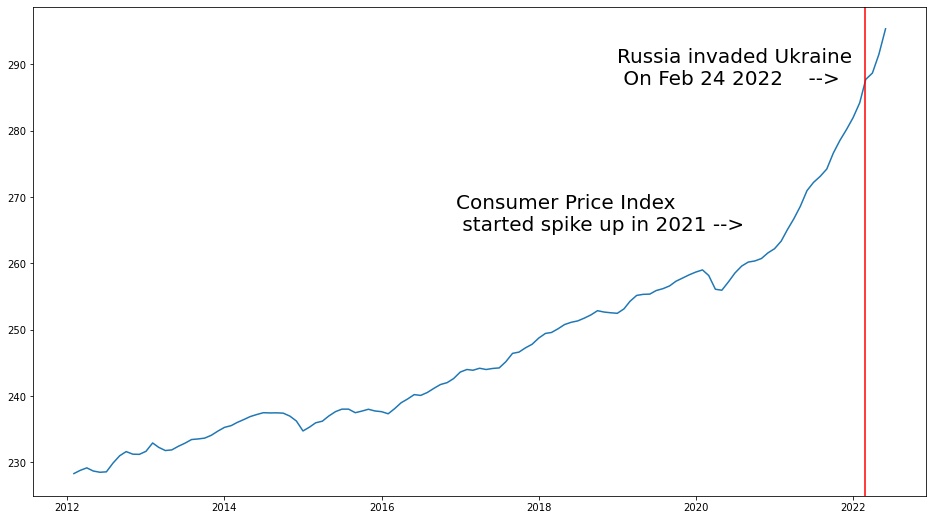

In [4]:
plt.figure(figsize=(16,9))
plt.plot(cpi_mom)

plt.axvline(ukraine_war, c = 'red')
plt.text(ukraine_war+datetime.timedelta(days = -1150), 287
         ,'Russia invaded Ukraine\n On Feb 24 2022    -->'
         , fontsize=20)

# Now plotting the CPI spike:
plt.text(ukraine_war+datetime.timedelta(days=-1900),265
         ,'Consumer Price Index \n started spike up in 2021 -->'
         ,fontsize=20)

plt.show()

In [31]:
from matplotlib.dates import date2num

In [78]:
ymark = cpi_mom[-5]
xpos = cpi_mom.index[-5]
xmark = cpi_mom[xpos]

In [80]:
print(xmark, xpos, ymark)

284.182 2022-02-01 00:00:00 284.182


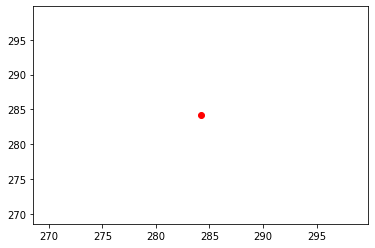

In [130]:
plt.plot(xmark, ymark, 'ro')
plt.show()

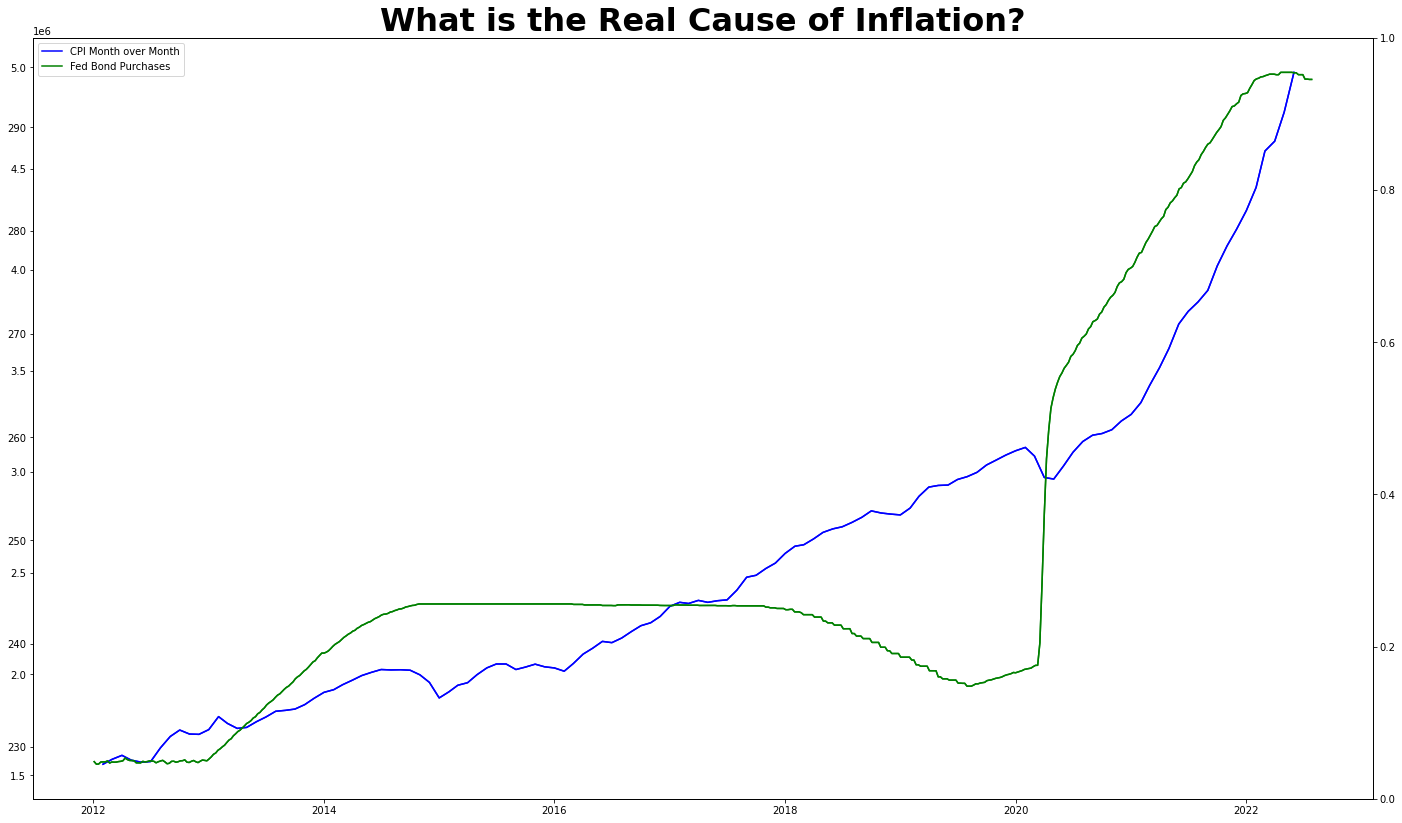

In [132]:
#Ukraine war wasn't the cause of the inflation spike. So what was?
# Let's keep looking.

start_date = dp.parse('2012-01-01')
ukraine_war = dp.parse('2022-02-24')

cpi_mom = fred.get_series('CPIAUCSL')
cpi_mom = cpi_mom[cpi_mom.index > start_date]

fed_bonds = fred.get_series('WSHONBNL')
fed_bonds = fed_bonds[fed_bonds.index > start_date]

fig, ax1 = plt.subplots(figsize = (24,14))
ax2 = ax1.twinx()
ax3 = ax2.twinx()
# ax3 = ax1.twinx()


ax1.plot(cpi_mom, c='blue', label = 'CPI Month over Month')
ax2.plot(fed_bonds, c='green', label = 'Fed Bond Purchases')
# ax3.plot(cpi_mom, c = 'red', ls = '-.')

# ax1.axvline(ukraine_war, c='darkred', ls = '--', label = 'Russia Invades Ukraine')

# ax1.axvspan(cpi_mom[-5], cpi_mom[-1], color='darkred', label = 'Russia Invades Ukraine', alpha = 0.3)

# ymark = cpi_mom[-5]
# xpos = cpi_mom.index[-5]
# xmark = cpi_mom[xpos]  
            
# ax1.text(ukraine_war+datetime.timedelta(days=-1400),287
#          ,'Russia invaded Ukraine \n On 24 Feb 2022 -->'
#          ,fontsize=20)
# ax1.text(ukraine_war+datetime.timedelta(days=-1950),230
#          ,'FED started unlimited QE\n in March 2020         -->'
#          ,fontsize=20)

# Ukraine war dot
# ukx = [240]
# uky = [-1500]
# plt.plot(ukx, uky, markersize = 5, markeredgecolor = 'black', markerfacecolor = 'mediumblue')

# plt.annotate("Ukraine War", xy = (ukraine_war, 


# Titles and legends:
lns1 = ax1.plot(cpi_mom,c='blue', label = 'CPI Month over Month')
lns2 = ax2.plot(fed_bonds,c='green', label = 'Fed Bond Purchases')
# lns3 = ax1.plot(ukraine_war,c='darkred', ls = '--', label = 'Russia Invades Ukraine')
leg = lns1 + lns2
labs = [l.get_label() for l in leg]

plt.title("What is the Real Cause of Inflation?", fontsize = 32, fontweight = 'bold')
ax1.legend(leg, labs, loc = 0)
plt.show()

# Working Chart

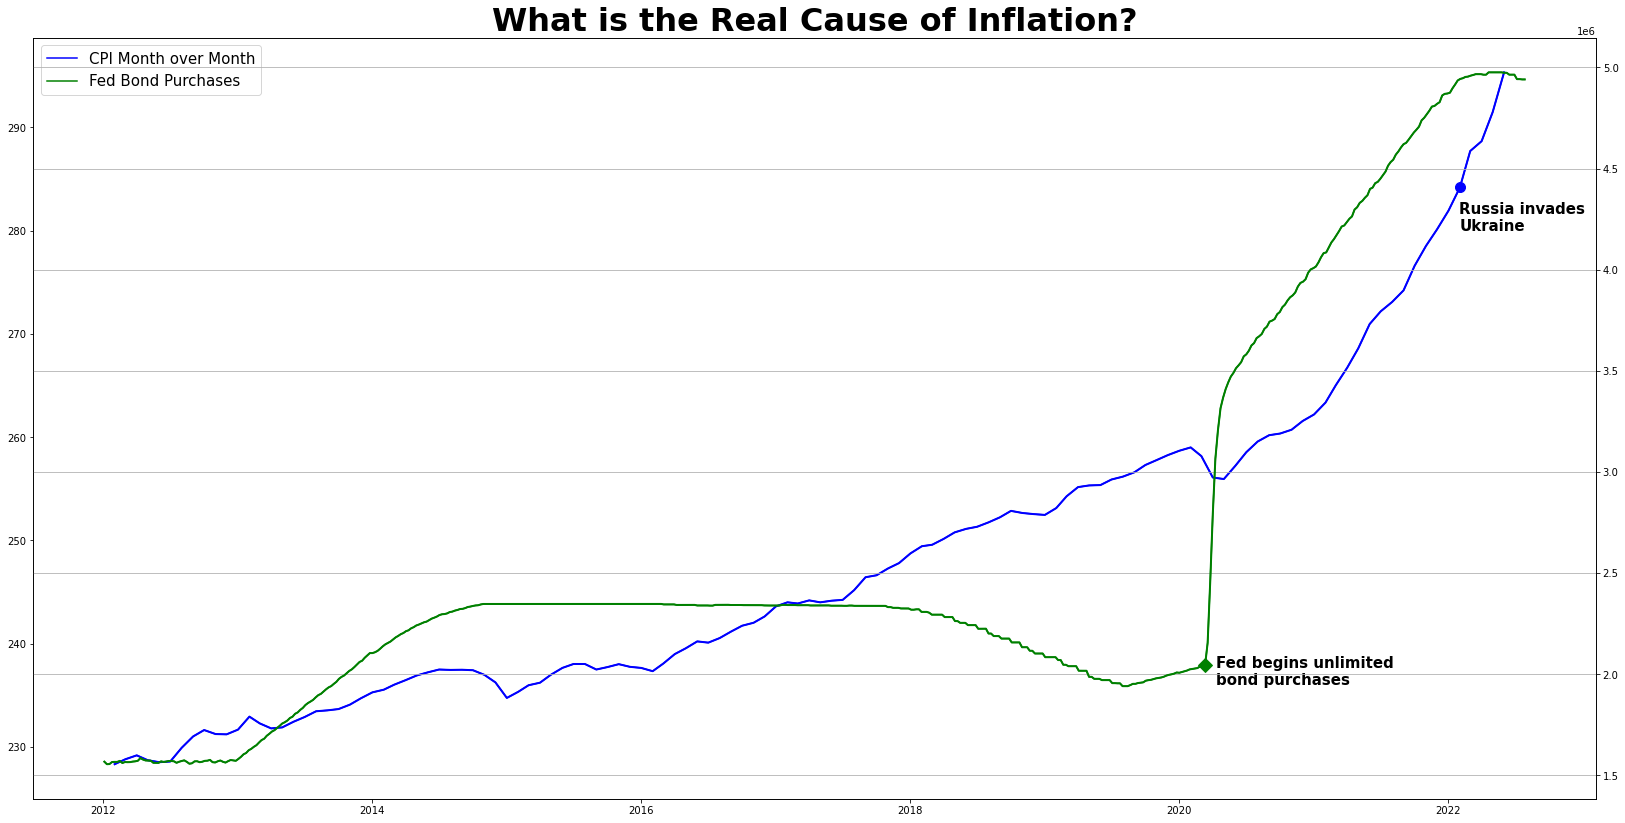

In [208]:
#Ukraine war wasn't the cause of the inflation spike. So what was?
# Let's keep looking.

start_date = dp.parse('2012-01-01')
ukraine_war = dp.parse('2022-02-24')
bond_start = dp.parse('2020-03-11')


cpi_mom = fred.get_series('CPIAUCSL')
cpi_mom = cpi_mom[cpi_mom.index > start_date]

markers_on = [120]

fed_bonds = fred.get_series('WSHONBNL')
fed_bonds = fed_bonds[fed_bonds.index > start_date]

fed_marker = [-125]

fig, ax1 = plt.subplots(figsize = (28,14))
ax2 = ax1.twinx()
# ax3 = ax1.twinx()

# highlight_dates = cpi_mom.index[[-5]]
# ax3.scatter(x = cpi_mom.index[-5], y = cpi_mom[-5], color = 'red', marker = 'd')

# Text for the Ukraine War start:
# ymark = cpi_mom[-5]
# xpos = cpi_mom.index[-5]
# xmark = cpi_mom[xpos]  
# ax3.plot(xmark, ymark, 'ro')

ax1.plot(cpi_mom, c='blue', markevery = markers_on, marker = 'o', markersize = 10, linewidth = 2, label = 'CPI Month over Month')
ax2.plot(fed_bonds, c='green', markevery = fed_marker, marker = 'D', markersize = 10, linewidth = 2, label = 'Fed Bond Purchases')
# ax3.plot(cpi_mom[-5], c = 'red', marker = 'o')

ax1.text(ukraine_war+datetime.timedelta(days = -25), 280, s = "Russia invades \nUkraine", fontsize = 15, fontweight = 'bold',  zorder = 1)
ax1.text(bond_start+datetime.timedelta(days = +30), 236, s = "Fed begins unlimited \nbond purchases", fontsize = 15, fontweight = 'bold', zorder = 1)

# Titles and legends:
lns1 = ax1.plot(cpi_mom,c='blue', label = 'CPI Month over Month')
lns2 = ax2.plot(fed_bonds,c='green', label = 'Fed Bond Purchases')
# lns3 = ax1.plot(ukraine_war,c='darkred', ls = '--', label = 'Russia Invades Ukraine')
leg = lns1 + lns2
labs = [l.get_label() for l in leg]

plt.grid(visible=True)
plt.title("What is the Real Cause of Inflation?", fontsize = 32, fontweight = 'bold')
ax1.legend(leg, labs, loc = 0, fontsize = 15)
# plt.ticklabel_format(useOffset=False)
# plt.tight_layout()
plt.show()

In [96]:
len(fed_bonds)

552

In [103]:
fed_bonds.index[-125]

Timestamp('2020-03-11 00:00:00')

In [38]:
cpi_mom[-1]

295.328

In [45]:
cpi_df = pd.Series.to_frame(cpi_mom, name="cpi")

In [46]:
cpi_df

,cpi
2012-02-01,228.329
2012-03-01,228.807
2012-04-01,229.187
2012-05-01,228.713
2012-06-01,228.524
...,...
2022-02-01,284.182
2022-03-01,287.708
2022-04-01,288.663
2022-05-01,291.474


In [47]:
fed_df = fed_bonds.to_frame(name = "fed_bonds")

In [48]:
fed_df

,fed_bonds
2012-01-04,1566954.0
2012-01-11,1554407.0
2012-01-18,1555200.0
2012-01-25,1565237.0
2012-02-01,1565905.0
...,...
2022-06-29,4964057.0
2022-07-06,4941958.0
2022-07-13,4941958.0
2022-07-20,4940459.0


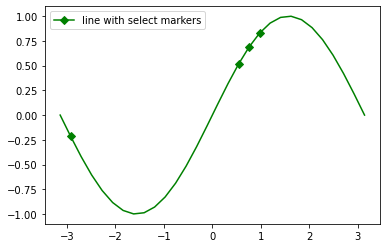

In [57]:
xs = np.linspace(-np.pi, np.pi, 30)
ys = np.sin(xs)
markers_on = [1, 17, 18, 19]
plt.plot(xs, ys, '-gD', markevery=markers_on, label='line with select markers')
plt.legend()
plt.show()

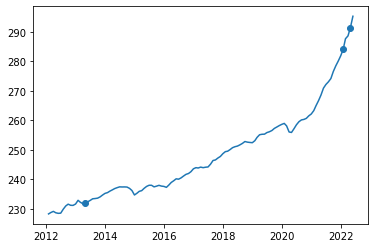

In [75]:
marker_on = [15,120,123]

figsize = (16,9)
plt.plot(cpi_df, markevery = marker_on, marker = 'o')


plt.show()

In [72]:
len(cpi_mom)

125

In [6]:
type(ukraine_war)

datetime.datetime

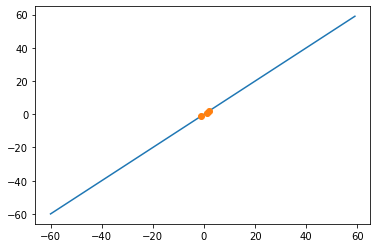

In [7]:
vals,poly = range(-60,60), range(-60,60)

plt.plot(vals, poly, label='some graph')
roots = [-1,1,2]

mark = [vals.index(i) for i in roots]

plt.plot(roots,[poly[i] for i in mark], ls="", marker="o", label="points")

plt.show()

In [8]:
cpi_mom.index

DatetimeIndex(['2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01',
               '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01',
               '2012-10-01', '2012-11-01',
               ...
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01'],
              dtype='datetime64[ns]', length=125, freq=None)

In [9]:
cpi_mom

2012-02-01    228.329
2012-03-01    228.807
2012-04-01    229.187
2012-05-01    228.713
2012-06-01    228.524
               ...   
2022-02-01    284.182
2022-03-01    287.708
2022-04-01    288.663
2022-05-01    291.474
2022-06-01    295.328
Length: 125, dtype: float64

In [10]:
df1 = pd.DataFrame({'cpi': cpi_mom})

In [11]:
df1

,cpi
2012-02-01,228.329
2012-03-01,228.807
2012-04-01,229.187
2012-05-01,228.713
2012-06-01,228.524
...,...
2022-02-01,284.182
2022-03-01,287.708
2022-04-01,288.663
2022-05-01,291.474


In [12]:
df1.loc

In [13]:
after_start_date = df1.index > ukraine_war
before_end_date = df1.index <= ukraine_war
date_ranges = after_start_date & before_end_date

In [14]:
filtered_dates = df1.loc[date_ranges]

In [15]:
filtered_dates

,cpi


In [16]:
df1.index <= ukraine_war

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False])